## Example 2 - Time Adjustments <a class="anchor" id="TOC7"></a>

In this example we will:

1. Load data from a Grimm .txt file produced with the old Grimm software (v. 1.177). A load function for data from the new software is also avaialbe named IL.Load_Grimm_new().
2. Shift the data 50.000 seconds, just because I can (normally this function is to align two instruments that are measuring in parallel but where the time has not been syncronized before start). 
3. Rebin the dataset by a factor of 10, reducing the time resolution and as a result smoothing the data as 10 measurements are averaged. 
4. Crop the final day of the dataset. 
5. Plot all the datasets in one figure. 

#### Example 2 full script:

First we look at the entire script and then go through parts of it with detailed descriptions of each process.

No zeros, continuing
No zeros, continuing
No zeros, continuing
No zeros, continuing


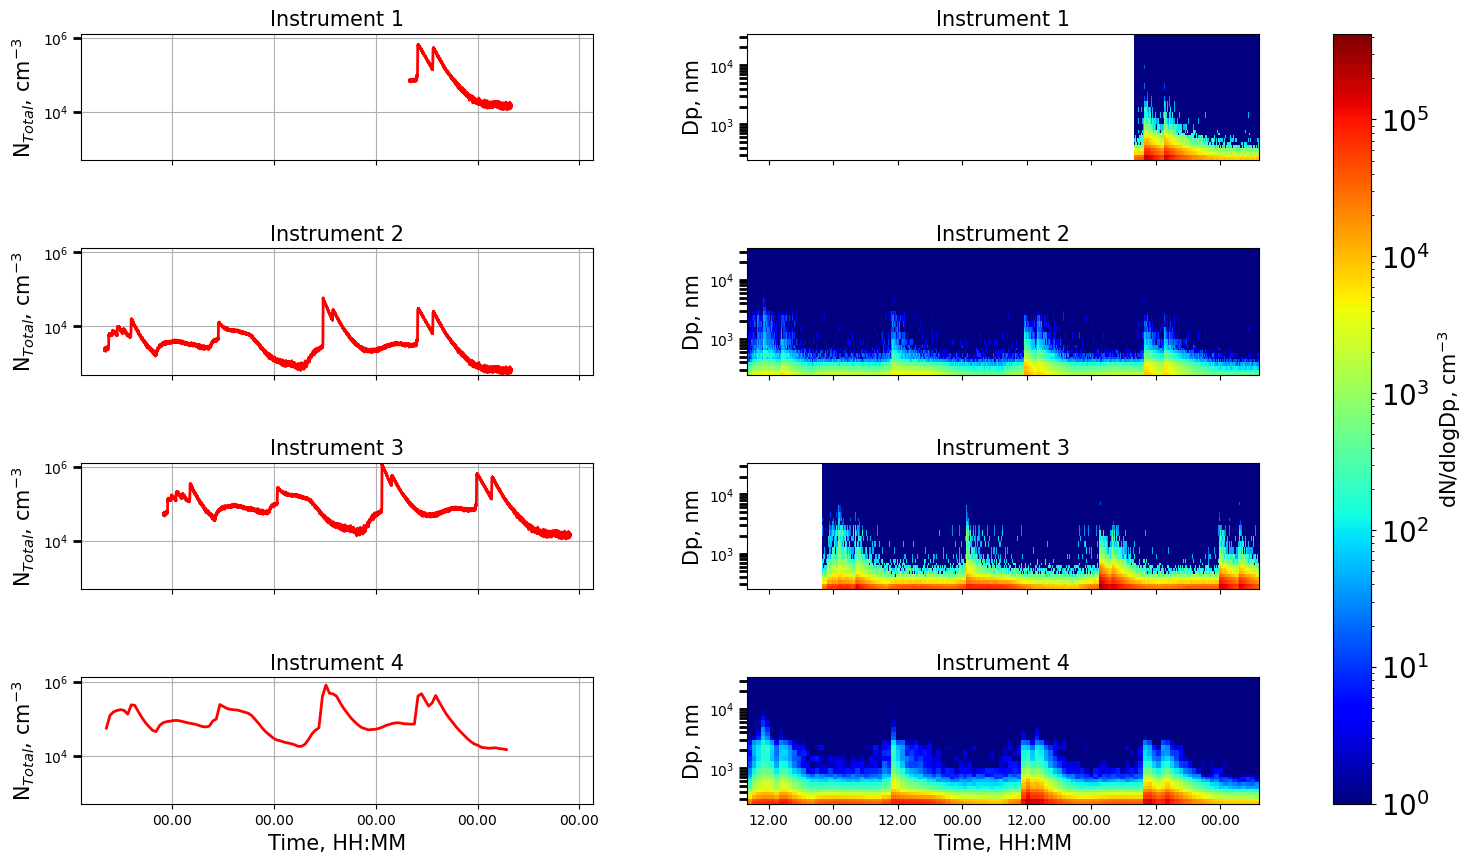

In [3]:
import NFA_Aerosol.Instrument_Lib as IL
import NFA_Aerosol.Plot_Lib as PL
import NFA_Aerosol.Utility_Lib as UL
import datetime as datetime

Grimm_File = r"L:\PG-Nanoteknologi\PERSONER\ABL\Experimental Data\Data_Python\Grimm_old.txt"
start = datetime.datetime(2019,7,15,8,0,0)
end = datetime.datetime(2019,7,19,8,0,0)

data, bin_edges, header = IL.Load_Grimm_old(Grimm_File,start,end)

data_N = UL.Normalize_dndlogdp(data,bin_edges)

data_shift = UL.time_shift(data_N,50000)

data_smooth = UL.time_rebin(data_N,50)

new_start = datetime.datetime(2019,7,18,8,0,0)
data_crop = UL.time_crop(data_N,start = new_start)

fig,axs = PL.Plot_timeseries_multiple([data_crop,data,data_shift,data_smooth],bin_edges,y_3d=(1,0),sharex=1)

#### Example 2 in detail:

Note that we also import a library called datetime together with the NFA Python library. This is because we will be specifying start and stop times in this example, so to tell Python that its working with dates and times we need make datetime objects. To be able to use the datetime functions we import the script named datetime as datetime, so we have to write datetime.xxx to access these functions.

In [ ]:
import datetime as datetime

The first line, after importing the NFA library, tells Python where the data file is located.

In [ ]:
Grimm_File = r"L:\PG-Nanoteknologi\PERSONER\ABL\Grimm_old.txt"

The two following lines are used specify a time and date for Python to start and to stop loading the data. This is because the datafile is very long and we are only interested in parts of it. We ask Python only to load data from 08:00:00 on the 15. of July 2019 to the 19th of July at 08:00:00. We tell Python the times and dates as: datetime.datetime(2019,7,15,8,0,0)

You can also just specify a start in which case the function includes all datapoints after the specified time, or just specify an end time, in which case Python includes all datapoints before that time.

In [ ]:
start = datetime.datetime(2019,7,15,8,0,0)
end = datetime.datetime(2019,7,19,8,0,0)

In this example we are working with a Grimm dataset, which was exported with the old software (v 1.177), so we need to use the Load_Grimm_old function. We pass the file location as well as the start and end time to the load function, giving us an output with the same structure as example 1.

In [ ]:
data, bin_edges, header = IL.Load_Grimm_old(Grimm_File,start,end)

We then normalize the dataset, as the loaded file is concentration dN, so we normalize to get dN/dlogDp, using the function UL.Normalize_dndlogdp, which takes a data array and the bin_edges of the instrument both of which are returned by the load function.

In [ ]:
data_N = UL.Normalize_dndlogdp(data,bin_edges)

The next line of code is to exemplify the use of the time shift function, which shifts an entire dataset by a specified number of seconds. The dataset can be shifted both forward and backwards in time. This is primarily meant for instruments measuring in parallel, but where the times were not synchronized before starting the experiment. You woul then be able to shift one dataset to match the other. Here we shift the dataset by 50.000 seconds, just to show its use. Normally you would only need to shift it a few seconds or minutes.

In [ ]:
data_shift = UL.time_shift(data,50000)

For datasets with a high time resolution e.g. 1 measurement per second, there is often a lot of noise. We can reduce this noise at the expense of time resolution so by taking the average of every e.g. 5 or 10 datapoints. For this we can use the time_rebin function. Here we bin 50 datapoints to greatly reduce the time resolution and smooth the dataset. Normally a rebin factor of 2-5 is sufficient.

In [ ]:
data_smooth = UL.time_rebin(data,50)

If we have imported a full dataset, but we want to crop it into smaller bits, then we can use the time_crop function, which takes a new datetime starting point and/or an end datetime. Here we suffice to move the start time to the 18th rather than the 15th of July.

In [ ]:
new_start = datetime.datetime(2019,7,18,8,0,0)
data_crop = UL.time_crop(data,start = new_start)

Finally, we plot the cropped, original, shifted, and smoothed datasets in the same figure with the Plot_timeseries_multiple. This function requires the datasets to follow the same sizebins, so it cannot be used for datasets from different instruments. The datasets have to be passed to the function in a list so with square brackets and comma seperated:

[data_crop, data, data_shift, data_smooth]

We also pass the bin_edges, which are shared by all datasets, and then we specify a lower concentration limit of 1 via y_3d=(1,0), as some of the datasets contain a concentration of 0, which cannot be showed on a logarithmic plot. At the end we tell Python to make the plots share the x-axis, which is defined by the final dataset in the input list. 

In [ ]:
fig,axs = PL.Plot_timeseries_multiple([data_crop,data,data_shift,data_smooth],bin_edges,y_3d=(1,0),sharex=1)

You can see that the top plot is cropped, so it does not have data before the 18th, the second plot has the full dataset, the third has been shifted with respect to time, while the final plot is smoothed